In [101]:
# importing all the necessary libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
# loading the dataset

data = pd.read_csv('https://raw.githubusercontent.com/Archanajs2001/Data-QA-QC-Internship-task-Datahut/main/messy_data.csv', index_col=0)

In [103]:
data.head(15)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66.0,pperkinshotmail.com,17/09/2020,77311.000000,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38.0,josephrobertsongmail.com,2021-01-12,NaN,Support
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR


In [104]:
data.info()

#except ID all other variables have null values

<class 'pandas.core.frame.DataFrame'>
Index: 11000 entries, 0 to 7107
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          11000 non-null  object 
 1   Name        8667 non-null   object 
 2   Age         9253 non-null   float64
 3   Email       9731 non-null   object 
 4   Join Date   8808 non-null   object 
 5   Salary      8761 non-null   float64
 6   Department  8745 non-null   object 
dtypes: float64(2), object(5)
memory usage: 687.5+ KB


In [105]:
# duplicate entries with same ID which is the primary key

data.groupby('ID').filter(lambda x: len(x) > 1)

,ID,Name,Age,Email,Join Date,Salary,Department
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23.0,robert43@gmail.com,2023-09-08,112970.000000,Engineering
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60.0,griffinlinda@harrison.com,16/10/2003,51625.814403,Marketing
24,3f741e1f-f781-463e-a12a-871d3866c711,NaN,NaN,NaN,NaN,NaN,NaN
40,9aa93a07-4dac-4c44-bdde-0424c118041f,NaN,NaN,NaN,NaN,NaN,NaN
56,63c27bce-1226-4ac7-9990-1e66fb6d8229,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


In [106]:
#cheching to see if there is anything different in the rows with sameID

data[data['ID'] == '6714ff24-3600-4c6e-8eed-5b4224bd9e44']

,ID,Name,Age,Email,Join Date,Salary,Department
3978,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,NaN,147555.0,EngineeringF
3978,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,NaN,147555.0,Engineering


In [107]:
# 1000 duplicated rows exists with same ID

data.duplicated(subset='ID').sum()

1000

In [108]:
# dropping the duplicates

data.drop_duplicates(subset='ID', keep='first', inplace=True)

In [109]:
# count of null values in each columns

data.isnull().sum(axis=0)

ID               0
Name          2059
Age           1534
Email         1092
Join Date     1930
Salary        1978
Department    2005
dtype: int64

In [110]:
# dropping the null entries in Email since it is absolutely needed to contact the employee so choosing not to impute

data.dropna(subset=['Email'], inplace=True)

In [111]:
# adding @ before domain names that don't have it

def correct_email_provider(email):
    # Remove leading and trailing whitespaces
    email = email.strip()
    providers = ['gmail', 'yahoo', 'hotmail']
    for provider in providers:
        # Check if the email ends with the provider without '@'
        if email.endswith(provider + ".com") and not email.endswith('@' + provider + ".com"):
            email = email.replace(provider + ".com", '@' + provider + ".com")
    return email

# Apply the function to correct the 'Email' column
data['Email'] = data['Email'].apply(correct_email_provider)

In [112]:
data.head(15)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66.0,pperkins@hotmail.com,17/09/2020,77311.000000,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38.0,josephrobertson@gmail.com,2021-01-12,NaN,Support
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR


In [113]:
# removing emails with invalid format

# Define a function to validate email addresses
def is_valid_email(email):
    # Remove leading and trailing whitespaces
    email = email.strip()
    # Regular expression for validating an email address
    email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(email_regex, email) is not None

# Apply the function to filter the DataFrame

data = data[data['Email'].apply(is_valid_email)]

In [114]:
data.head(15)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66.0,pperkins@hotmail.com,17/09/2020,77311.000000,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38.0,josephrobertson@gmail.com,2021-01-12,NaN,Support
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR
10,d5fe9321-49cf-4f14-ac96-7aea1204247b,Craig Conway,88.0,gerald47@woodard-smith.com,NaN,81214.525972,Engineering
11,21763907-db1a-400a-8464-e3af593c3abc,Raymond Wilson,44.0,katherinewallace@hotmail.com,2021-08-26,128335.000000,HRC
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23.0,robert43@gmail.com,2023-09-08,112970.000000,Engineering


In [115]:
data.isnull().sum()

ID              0
Name          824
Age           386
Email           0
Join Date     723
Salary        747
Department    775
dtype: int64

In [116]:
# filling null variables in 'Name' column with the placeholder 'Unknown'

data['Name'].fillna('Unknown', inplace=True)

<Axes: >

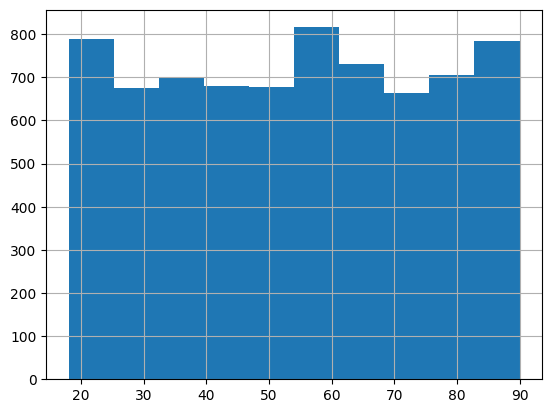

In [117]:
# Distribution graph for 'Age'

data['Age'].hist()

In [118]:
#data['Age'].fillna(data['Age'].median(), inplace=True)

<Axes: xlabel='Age', ylabel='Salary'>

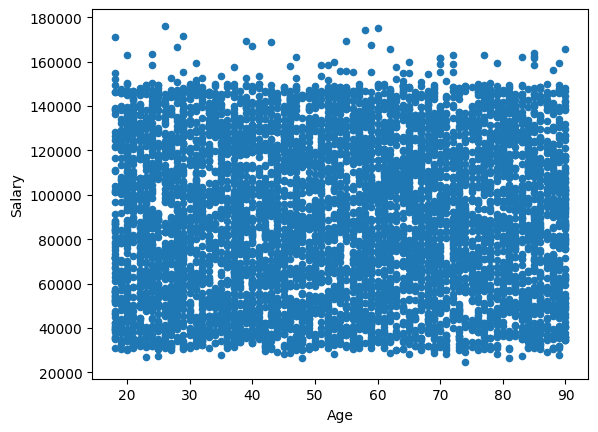

In [119]:
#Age VS Salary

data.plot(kind='scatter', x='Age', y='Salary')

#shows no significant relationship

In [120]:
# filling null entries in 'Age' with random module in numpy to show bias

data['Age'] = data['Age'].apply(lambda x: np.random.uniform(18, 90) if pd.isnull(x) else x)

In [121]:
# standardising dates in the 'Join Date' column to 'yyyy-mm-dd' format

def parse_mixed_date_format(date_str):
    try:
        # First, try parsing as day/month/year
        return pd.to_datetime(date_str, format='%d/%m/%Y')
    except ValueError:
        try:
            # If the first format fails, try parsing as year-month-day
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except ValueError:
            # If both formats fail, return NaT
            return pd.NaT

# Apply the parsing function to 'Join Date'
data['Join Date'] = data['Join Date'].apply(parse_mixed_date_format)

In [122]:
# making a column with only the year from 'Join Date' column

data['Join Year'] = data['Join Date'].dt.year

<Axes: >

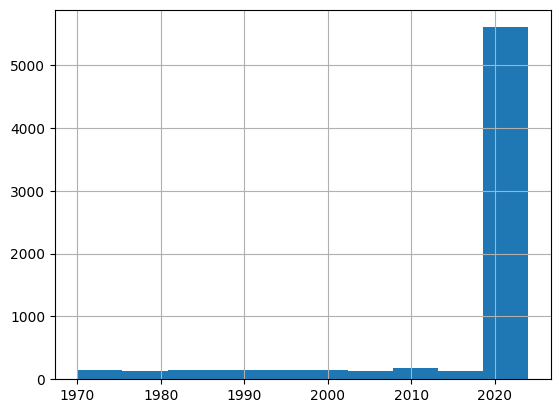

In [123]:
# distribution graph for 'Join Year'

data['Join Year'].hist()

In [124]:
# grouping by 'Join Year' to observe the count

data.groupby('Join Year').size()

Join Year
1970.0      27
1971.0      26
1972.0      26
1973.0      22
1974.0      18
1975.0      32
1976.0      20
1977.0      33
1978.0      20
1979.0      21
1980.0      30
1981.0      19
1982.0      32
1983.0      22
1984.0      24
1985.0      24
1986.0      27
1987.0      34
1988.0      25
1989.0      40
1990.0      26
1991.0      28
1992.0      28
1993.0      23
1994.0      31
1995.0      30
1996.0      29
1997.0      25
1998.0      31
1999.0      21
2000.0      32
2001.0      10
2002.0      22
2003.0      27
2004.0      21
2005.0      29
2006.0      17
2007.0      30
2008.0      18
2009.0      37
2010.0      30
2011.0      31
2012.0      32
2013.0      26
2014.0      20
2015.0      23
2016.0      41
2017.0      25
2018.0      17
2019.0      27
2020.0    1271
2021.0    1267
2022.0    1266
2023.0    1236
2024.0     533
dtype: int64

In [125]:
data['Join Date'].max()

Timestamp('2024-06-13 00:00:00')

In [126]:
# filling null variables in 'Join Date' with random dates from the year 2020 to 2024 since those years show significantly higher recruitments from the previous years

start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 6, 13)

# Function to randomly generate dates within a range
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Filter rows with missing 'Join Date'
missing_dates = data['Join Date'].isnull()

# Generate random dates and fill missing 'Join Date'
data.loc[missing_dates, 'Join Date'] = [random_date(start_date, end_date) for _ in range(missing_dates.sum())]

In [127]:
data['Join Date'].isnull().sum()

0

In [128]:
#data['Join Date'].fillna(data['Join Date'].median(), inplace=True)

In [129]:
# standardising department names since some of them contain typos at the end

data.loc[data['Department'].str.contains('Support', case=False, na=False), 'Department'] = 'Support'
data.loc[data['Department'].str.contains('Engineering', case=False, na=False), 'Department'] = 'Engineering'
data.loc[data['Department'].str.contains('Sales', case=False, na=False), 'Department'] = 'Sales'
data.loc[data['Department'].str.contains('Marketing', case=False, na=False), 'Department'] = 'Marketing'
data.loc[data['Department'].str.contains('HR', case=False, na=False), 'Department'] = 'HR'

<Axes: >

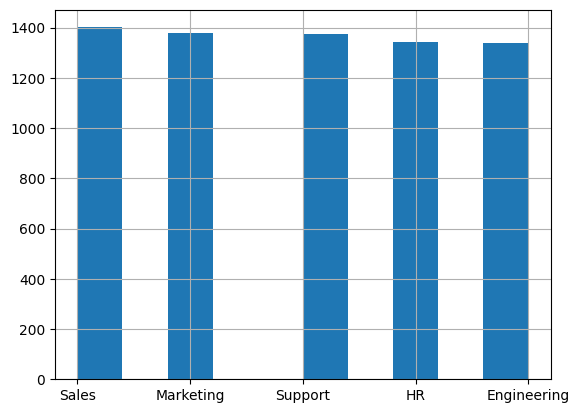

In [130]:
# Department distribution

data['Department'].hist()

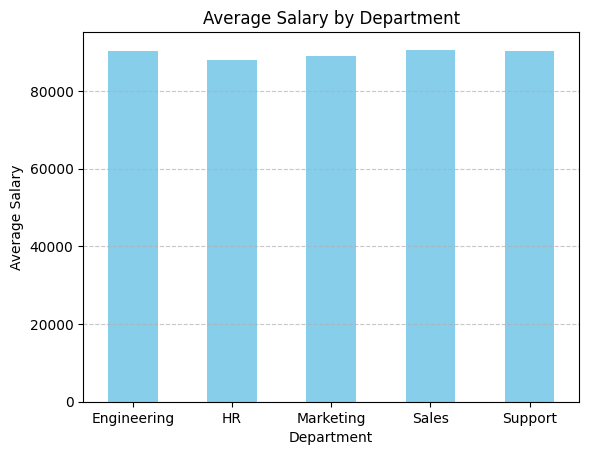

In [131]:
# Department VS Salary

mean_salaries = data.groupby('Department')['Salary'].median()

# Plotting
mean_salaries.plot(kind='bar', color='skyblue')

# Customize the bar plot
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#no significant correlation

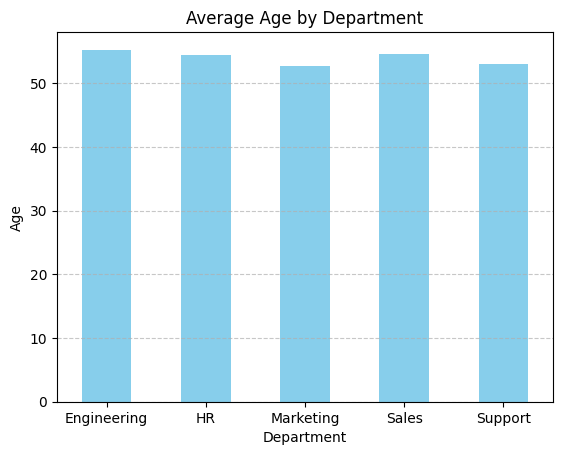

In [132]:
#Age VS Department

mean_salaries = data.groupby('Department')['Age'].mean()

# Plotting
mean_salaries.plot(kind='bar', color='skyblue')

# Customize the bar plot
plt.xlabel('Department')
plt.ylabel('Age')
plt.title('Average Age by Department')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# not much correlation

In [133]:
# employee count in each department

data['Department'].value_counts()

Department
Sales          1401
Marketing      1377
Support        1374
HR             1341
Engineering    1337
Name: count, dtype: int64

In [134]:
# imputing null variables in 'Department' randomly to not introduce bias

existing_departments = data['Department'].dropna().unique()

# Function to uniformly impute null values with existing departments
def fill_missing_department(dept):
    if pd.isnull(dept):
        return random.choice(existing_departments)
    else:
        return dept

# Apply the function to 'Department' column
data['Department'] = data['Department'].apply(fill_missing_department)

<Axes: >

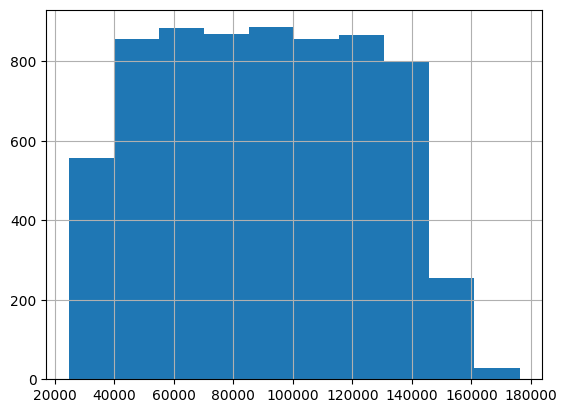

In [135]:
# distribution of 'Salary'

data['Salary'].hist()

# positively skewed

In [136]:
# Median Salary in each Departments

data.groupby('Department')['Salary'].median()

Department
Engineering    90202.883878
HR             88369.000000
Marketing      88952.477207
Sales          90307.000000
Support        89660.444307
Name: Salary, dtype: float64

In [137]:
#imputing null variables in Salary with the median Salary in their department

data['Salary'].fillna(data.groupby('Department')['Salary'].transform('median'), inplace=True)

In [138]:
#data['Salary'].fillna(data['Salary'].median(), inplace=True)

In [139]:
# changing data types of 'Age' and 'Salary' to get rid of noise

data['Salary'] = data['Salary'].astype(int)
data['Age'] = data['Age'].astype(int)

<Axes: >

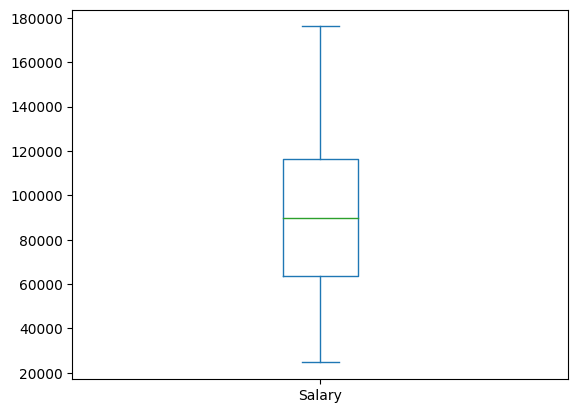

In [140]:
#box plot for salary
data['Salary'].plot(kind='box')

#no outliers

In [141]:
data.head(20)

,ID,Name,Age,Email,Join Date,Salary,Department,Join Year
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2023-02-21,88552,Sales,NaN
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2021-11-08,143456,Marketing,NaN
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,2016-10-15,123018,Support,2016.0
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66,pperkins@hotmail.com,2020-09-17,77311,HR,2020.0
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertson@gmail.com,2021-01-12,89660,Support,2021.0
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71,andrew74@hotmail.com,2022-02-12,83354,Sales,2022.0
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701,HR,2022.0
10,d5fe9321-49cf-4f14-ac96-7aea1204247b,Craig Conway,88,gerald47@woodard-smith.com,2023-07-20,81214,Engineering,NaN
11,21763907-db1a-400a-8464-e3af593c3abc,Raymond Wilson,44,katherinewallace@hotmail.com,2021-08-26,128335,HR,2021.0
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23,robert43@gmail.com,2023-09-08,112970,Engineering,2023.0


In [142]:
# removing noise added to names

def clean_name(name):
    # Remove 'Mr.' or 'Mrs.' and so on at the beginning (case insensitive)
    #cleaned_name = re.sub(r'^(Mr\.|Mrs\.|Miss\.|Dr\.)\s+', '', name, flags=re.IGNORECASE)
    cleaned_name = re.sub(r'^([A-Za-z]+\.)?\s*', '', name, flags=re.IGNORECASE)

    # Remove any trailing capital letters
    cleaned_name = re.sub(r'[A-Z]+$', '', cleaned_name)

    # Remove any leading capital letters
    cleaned_name = re.sub(r'\b[A-Z]{2,}[a-z]+\b', '', cleaned_name)

    return cleaned_name.strip()  # Remove any leading or trailing whitespace

# Apply the cleaning function to the 'Name' column
data['Name'] = data['Name'].apply(clean_name)

In [143]:
data[data['Email'] == 'gibsonjohnathan@gmail.com']

,ID,Name,Age,Email,Join Date,Salary,Department,Join Year
2342,723f5799-484b-467d-8277-ff6d2f73656f,Catherine Reid,47,gibsonjohnathan@gmail.com,2022-02-22,89031,Marketing,2022.0


In [144]:
data[data['Email'] == 'daniel45@robinson.info']

,ID,Name,Age,Email,Join Date,Salary,Department,Join Year
951,52c76e66-a829-4a54-9545-b3cf7712017c,Alexa Elliott,69,daniel45@robinson.info,2022-12-07,104527,Support,2022.0


In [145]:
# Removing extraneous words from name fields

# Function to fetch all common English words from NLTK
def fetch_common_words():
    # List of common English words from NLTK words corpus
    common_words = set(wn.words())

    # Convert to lowercase for consistent matching
    common_words = {word.lower() for word in common_words}

    return common_words

# Fetch common words
common_words = fetch_common_words()

# Function to clean the last name by removing the longest matching common suffix word
# Only applies to last names with more than 7 letters
def clean_last_name(name, common_words):
    # Split the name into parts
    name_parts = name.split()

    if len(name_parts) < 2:
        # If there's no last name part, return the name as is
        return name.title()

    # Extract the last name part
    last_name = name_parts[-1].lower()

    if len(last_name) > 7:  # Only consider last names with more than 7 letters
        # Iterate over possible suffix lengths to find the longest match
        for i in range(len(last_name), 0, -1):
            suffix = last_name[-i:]
            if suffix in common_words:
                last_name = last_name[:-i].strip()
                break
        else:
        # If no match found, return the original name
          return last_name

    # Reconstruct the full name with the cleaned last name
    name_parts[-1] = last_name.capitalize()
    cleaned_name = ' '.join(name_parts)

    return cleaned_name

# Apply the function to the 'Name' column
data['Name'] = data['Name'].apply(lambda x: clean_last_name(x, common_words))



In [146]:
#dropping 'Join Year'

data.drop('Join Year', axis=1, inplace=True)

In [147]:
# saving the cleaned data to new csv file

data.to_csv('cleaned_dataset.csv', index=False)

In [148]:
cleaned_data = pd.read_csv('cleaned_dataset.csv')

In [149]:
cleaned_data.head()

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2023-02-21,88552,Sales
1,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2021-11-08,143456,Marketing
2,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,2016-10-15,123018,Support
3,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown,66,pperkins@hotmail.com,2020-09-17,77311,HR
4,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertson@gmail.com,2021-01-12,89660,Support
